In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
import matplotlib.image as mpimg

from sklearn import decomposition
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import gaussian_process

In [2]:
features = np.loadtxt('../data/features_ALL.txt', delimiter=',')
#features = preprocessing.scale(features)
features_train = features[0:-54]
features_test = features[-54:-4]

In [4]:
test1 = features[-4]
test2 = features[-3]
test3 = features[-2]
test4 = features[-1]

pca = decomposition.PCA(n_components=20)
pca.fit(features_train)
features_train = pca.transform(features_train)
features_test = pca.transform(features_test)
test1 = pca.transform(test1)
test2 = pca.transform(test2)
test3 = pca.transform(test3)
test4 = pca.transform(test4)

/Users/gumiviet/Desktop/Work/work/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/gumiviet/Desktop/Work/work/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/gumiviet/Desktop/Work/work/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape

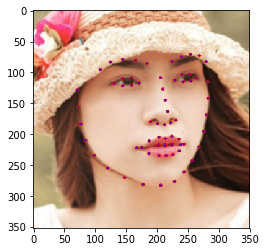

In [11]:
"""
test raw image
"""
img = mpimg.imread('./../hnh.jpg')
plt.imshow(img)
plt.show()

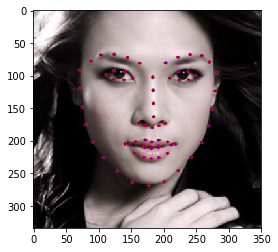

In [12]:
"""
test raw image
"""
img = mpimg.imread('./../mt.jpg')
plt.imshow(img)
plt.show()

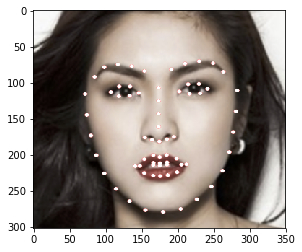

In [13]:
"""
test raw image
"""
img = mpimg.imread('./../tth.png')
plt.imshow(img)
plt.show()

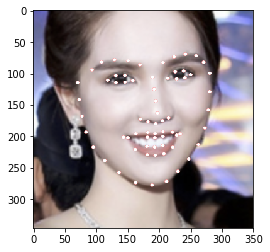

In [14]:
"""
test raw image
"""
img = mpimg.imread('./../nt.png')
plt.imshow(img)
plt.show()

In [17]:
ratings = np.loadtxt('../data/ratings.txt', delimiter=',')
#ratings = preprocessing.scale(ratings)
ratings_train = ratings[0:-50]
ratings_test = ratings[-50:]



In [18]:
regr = linear_model.LinearRegression()

regr.fit(features_train, ratings_train)
ratings_predict = regr.predict(features_test)
corr = np.corrcoef(ratings_predict, ratings_test)[0, 1]
print 'Correlation:', corr

residue = np.mean((ratings_predict - ratings_test) ** 2)
print 'Residue:', residue

print 'Ho Ngoc Ha: %f' % regr.predict(test1) 
print 'My Tam: %f' % regr.predict(test2) 
print 'Ngoc Trinh: %f' % regr.predict(test3) 
print 'Tang Thanh Ha: %f' % regr.predict(test4) 

Correlation: 0.581182256609
Residue: 0.203185974418
Ho Ngoc Ha: 2.344635
My Tam: 3.020720
Ngoc Trinh: 2.986468
Tang Thanh Ha: 2.800398


/Users/gumiviet/Desktop/Work/work/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


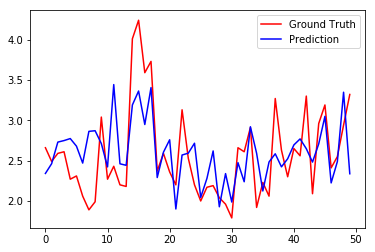

In [19]:
truth, = plt.plot(ratings_test, 'r')
prediction, = plt.plot(ratings_predict, 'b')
plt.legend([truth, prediction], ["Ground Truth", "Prediction"])

plt.show()